# Data exploration Topics

Made by: Elsa Kidman

In [2]:
import json
# Impory the file of all data from 2006-2022 with topics
f = open('../data/data_all/data_all_topic_final.json')
data_init = json.load(f)


In [54]:
import pandas as pd

# Create a dataframe of the data and preform some preprocessing to the data
df = pd.DataFrame(data_init)

# Convert the date column to date format
df['question_date'] = pd.to_datetime(df['question_date'])

# Make sure to replace empty lists of answers with empty strings instead
def replace_empty_answers(lst):
    return '' if len(lst) == 0 else lst

df['top_10_words_answer'] = df['top_10_words_answer'].apply(replace_empty_answers)

# Since the "Liberalerna" (L) party changed name from "Folk Partiet" (FP). It's still the same party.
df.loc[df['undertecknare_partibet'] == 'FP', 'undertecknare_partibet'] = 'L'
df.loc[df['besvaradav_partibet'] == 'FP', 'besvaradav_partibet'] = 'L'

df = df[df['besvaradav_partibet'] != '']


df.head()

,id_,question,question_date,answer,undertecknare_name,undertecknare_partibet,besvaradav_name,besvaradav_partibet,regering,id_topic_combined,top_10_words_combined,id_topic_question,top_10_words_question,id_topic_answer,top_10_words_answer
0,gx11839,\nden \r\n27 maj\nFråga \n2009/10:839 \r\nÖkat...,2010-05-27,\nden 2 juni\nSvar på fråga\n2009/10:839 Ökat ...,Karin Svensson Smith,MP,Åsa Torstensson,C,48.0,72,"cykling, motorcyklister, cyklister, elsparkcyk...",155,"cykling, elsparkcyklar, cyklister, cykla, omkö...",155,"cykling, elsparkcyklar, cyklister, cykla, omkö..."
1,gx11838,\nden \r\n26 maj\nFråga \n2009/10:838 \r\nFrys...,2010-05-26,\nden \r\n3 juni\nSvar på fråga\n2009/10:838 F...,Birgitta Eriksson,S,Beatrice Ask,M,48.0,4,"bankerna, finansiella, banker, finansinspektio...",94,"tullverket, brottslighet, stöldgods, brottsnät...",94,"tullverket, brottslighet, stöldgods, brottsnät..."
2,gx11837,\nden \r\n25 maj\nFråga \n2009/10:837 \r\nSver...,2010-05-25,\nden 4 juni\nSvar på fråga\n2009/10:837 Sveri...,Ameer Sachet,S,Ewa Björling,M,48.0,194,"epa, ceta, förhandlingarna, avs, avtalet, avs ...",148,"ceta, epa, förhandlingarna, avs, handelsavtal,...",4,"etiopien, västsahara, somaliland, somalia, fn,..."
3,gx11836,\nden \r\n25 maj\nFråga \n2009/10:836 \r\nSJ o...,2010-05-25,\nden 1 juni\nSvar på fråga\n2009/10:836 SJ oc...,Ameer Sachet,S,Maud Olofsson,C,48.0,0,"trafikverket, sj, eneroth, tomas eneroth, toma...",81,"tågtrafiken, trafikverket, tåg, elmsäter, cath...",282,"sj, sj ab, ab, tåg, resenärer, tågtrafik, bilj..."
4,gx11835,\nden \r\n24 maj\nFråga \n2009/10:835 \r\nAvrä...,2010-05-24,\nden 10 juni\nSvar på fråga\n2009/10:835 Avrä...,Helena Bargholtz,L,Carl Bildt,M,48.0,17,"iran, iranska, mänskliga, rättigheter, mänskli...",20,"iran, iranska, mänskliga, irans, rättigheter, ...",20,"iran, iranska, mänskliga, irans, rättigheter, ..."


In [17]:
parties_q = {'S':[], 'V':[], 'MP':[], 'C':[], 'L':[], 'M':[], 'KD':[], 'SD':[], '-':[]}
parties_a = {'S':[], 'V':[], 'MP':[], 'C':[], 'L':[], 'M':[], 'KD':[], 'SD':[], '-':[]}

parties_q_counter = {'S':[], 'V':[], 'MP':[], 'C':[], 'L':[], 'M':[], 'KD':[], 'SD':[], '-':[]}
parties_a_counter = {'S':[], 'V':[], 'MP':[], 'C':[], 'L':[], 'M':[], 'KD':[], 'SD':[], '-':[]}

for party, values in parties_q.items():
  parties_q_df = df[df['undertecknare_partibet'] == party]
  parties_a_df = df[df['besvaradav_partibet'] == party]
  parties_q[party] = parties_q_df
  parties_a[party] = parties_a_df

  # Count the topics for each party, questions and answers
  counter_q = parties_q_df['top_10_words_question'].value_counts().reset_index()
  counter_q.columns = ['Topic', 'Count']
  parties_q_counter[party] = counter_q

  counter_a = parties_a_df['top_10_words_answer'].value_counts().reset_index()
  counter_a.columns = ['Topic', 'Count']
  parties_a_counter[party] = counter_a


In [19]:
# How much the party S answers with the following topics. Other parties can also be choosen.
parties_a_counter['S']

,Topic,Count
0,"migrationsverket, asylsökande, uppehållstillst...",482
1,"elever, skolan, lärare, utbildning, utbildning...",436
2,"hälso, vården, sjukvården, vård, hälso sjukvår...",229
3,"finansminister, skatteverket, anders borg, bor...",194
4,"kraftnät, svenska kraftnät, el, ygeman, anders...",138
...,...,...
432,"radon, stadsutveckling, hållbar stadsutvecklin...",1
433,"vräkningar, vräkning, barnfamiljer, barn, berö...",1
434,"förorenade, förorenade områden, sanering, pfas...",1
435,"moldavien, hbt, moldaviens, chisinau, moldavis...",1


In [44]:
top_topics_questions = []
for i in range(6):
  data = df[df['id_topic_question'] == i]
  top_topics_questions.append(data)

In [31]:
len(top_topics_questions[2])

604

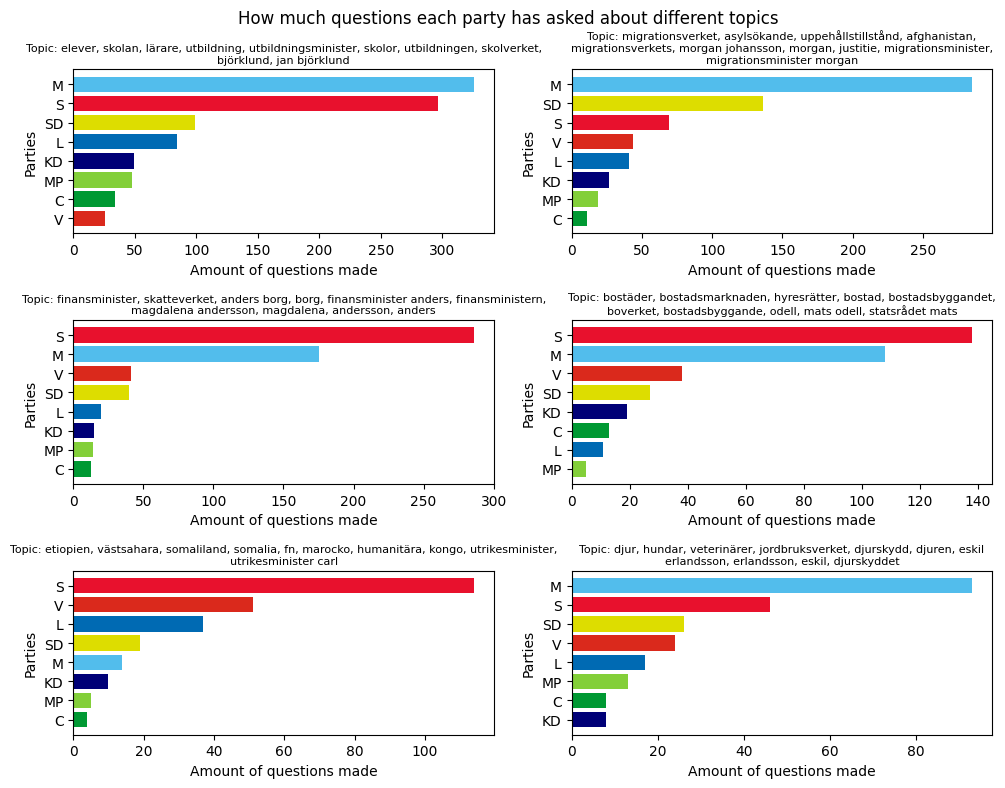

In [52]:
import matplotlib.pyplot as plt

party_color = {'S':"#E8112d", 'V':"#DA291C", 'MP':"#83CF39", 'C':"#009933", 'L': "#006AB3", 'M':"#52BDEC", 'KD':"#000077", 'SD': "#DDDD00", '-': "gray"}

fig, axs = plt.subplots(3, 2, figsize=(10, 8))
axs = axs.flatten()

t = []
for i in range(6):
  df_topic = df[df['id_topic_question'] == i]
  df_topic_count = df_topic['undertecknare_partibet'].value_counts()
  df_topic_count = sorted(df_topic_count.items(), key=lambda x: x[1], reverse=False)
  parties, party_questions = zip(*df_topic_count)

  axs[i].barh(parties, party_questions, color=[party_color[party] for party in parties])
  axs[i].set_xlabel('Amount of questions made')
  axs[i].set_ylabel("Parties")

  topic = df_topic['top_10_words_question'].values[0]
  axs[i].set_title(f'Topic: {topic}', fontsize=8, wrap=True)

fig.suptitle('How much questions each party has asked about different topics')
plt.tight_layout()
plt.show()

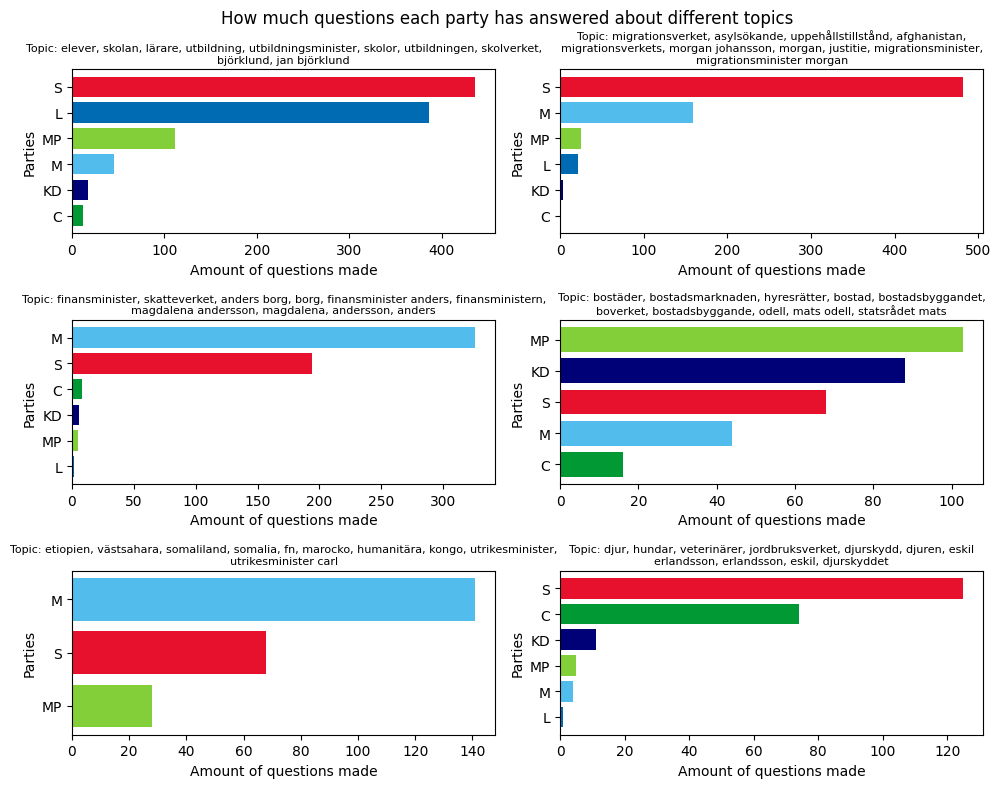

In [55]:
#
fig, axs = plt.subplots(3, 2, figsize=(10, 8))
axs = axs.flatten()

for i in range(6):
  df_topic = df[df['id_topic_answer'] == i]
  df_topic_count = df_topic['besvaradav_partibet'].value_counts()
  df_topic_count = sorted(df_topic_count.items(), key=lambda x: x[1], reverse=False)
  parties, party_answer = zip(*df_topic_count)

  axs[i].barh(parties, party_answer, color=[party_color[party] for party in parties])
  axs[i].set_xlabel('Amount of questions made')
  axs[i].set_ylabel("Parties")

  topic = df_topic['top_10_words_answer'].values[0]
  axs[i].set_title(f'Topic: {topic}', fontsize=8, wrap=True)

fig.suptitle('How much questions each party has answered about different topics')
plt.tight_layout()
plt.show()

### Get top topics for each person

In [74]:
# A function to get the topic count for a person.
def get_top_topic_for_person(df, person, typee):
  if typee == "top_10_words_question":
    return df[df['undertecknare_name'] == person]['top_10_words_question'].value_counts()
  if typee == "top_10_words_answer":
    return df[df['besvaradav_partibet'] == person]['top_10_words_answer'].value_counts()
  else:
    print("Wronge type")
    return None

In [58]:
df_people = df['undertecknare_name'].value_counts().reset_index()
df_people.columns = ['Person', 'Count']

In [83]:
# Tio 10 people who ask questions
top_10_people = df_people.iloc[:10]
top_10_people

,Person,Count
0,Markus Wiechel,532
1,Björn Söder,528
2,Sten Bergheden,356
3,Hans Wallmark,323
4,Lars Beckman,322
5,Betty Malmberg,311
6,Boriana Åberg,299
7,Carina Hägg,289
8,Cecilia Widegren,276
9,Ameer Sachet,222


In [86]:
# An example
person = top_10_people.iloc[2]['Person']
topics = get_top_topic_for_person(df, top_10_people.iloc[2]['Person'], "top_10_words_question")[:3]

print(f"Person {person} talks alot about {list(topics.index)}")

Person Sten Bergheden talks alot about ['vapen, jägare, sportskyttar, polismyndigheten, vapentillstånd, skjutbanor, vapenlicenser, vapenlagstiftningen, jägare sportskyttar, handläggningstiderna', 'skog, skogsstyrelsen, skogar, skogen, skogsägare, naturreservat, äganderätten, skogsbruket, markägare, artskyddsförordningen', 'varg, vargar, bevarandestatus, gynnsam bevarandestatus, gynnsam, naturvårdsverket, referensvärdet, vargstammen, rovdjur, licensjakt']
